# Introduction
This data set is include woman patients health features who is diabetes or not

Content:
1. [Load and Check Data](#1)
1. [Numeric Variable](#2)
1. [Outlier Detection](#3)
1. [Missing Value](#4)
    * [Find Missing Value](#5)
    * [Fill Missing Value](#6)
1. [Visualization](#7)
    * [Glucose Mean -- Label](#8)
    * [Insulin Mean -- Label](#9)
    * [BMI Mean -- Label](#10)
    * [BloodPressure Mean -- Label](#11)
    * [Pregnancies Mean -- Label](#12)
    * [SkinThickness Mean -- Label](#13)
    * [Age Mean -- Label](#14)
    * [DiabetesPedigreeFunction Mean -- Label](#15)
1. [Modelling](#16)
    * [Train - Test Split](#17)
    * [Simple Logistid Regression](#18)
    * [Hyperparameter Tuning -- Griid Search -- Cross Validation](#19)
    * [Ensemble Modeling](#20)
    * [Predict Test Data](#21)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


<a id="1"></a><br>
## Load and Check Data

In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

* Outcome feature is represent patients diabetes results
* Lets change this to Label

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data["Label"] = data.Outcome.values
data.drop(labels=["Outcome"], axis=1, inplace=True)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
len(data)

768

There is 768 patients

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<a id="2"></a><br>
## Variable Describe

1. Pregnancies: Number of times pregnant
1. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
1. BloodPressure: Diastolic Blood Pressure (mm Hg)
1. SkinThickness: Triceps skin fold thickness (mm)
1. Insulin: 2-Hour serum insulin (mu U/ml)
1. BMI: Body mass index (weight in kg/(height in m)^2)
1. DiabetesPedigreeFunction: Diabetes pedigree function
1. Age: Age (years)
1. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Label                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* float64 (2): BMI, DıabetesPedigreeFunction
* int64 (7): Pregnancies, Glucosei BloodPressure, SkinThickness, Insulin, Age, Outcome

<a id="2"></a><br>
# Numerical Variable
* This data set has not include categorical variable so lets look short the numerical variables

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("Frequancies")
    plt.title(f"{variable} distrubition with hist")

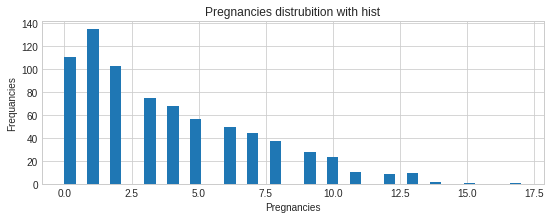

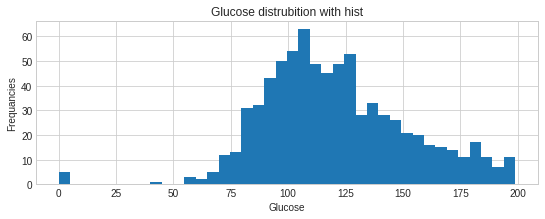

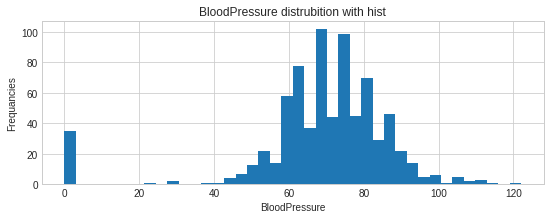

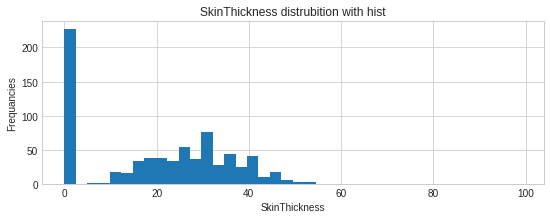

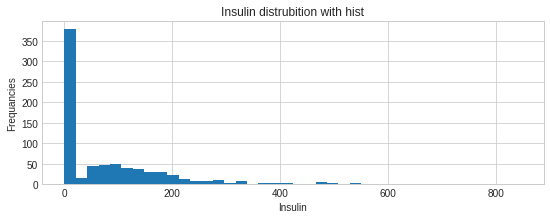

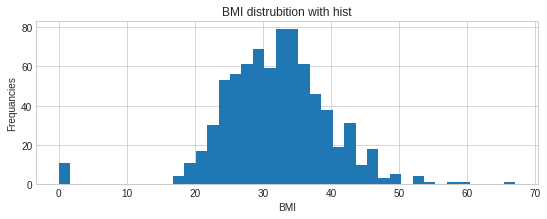

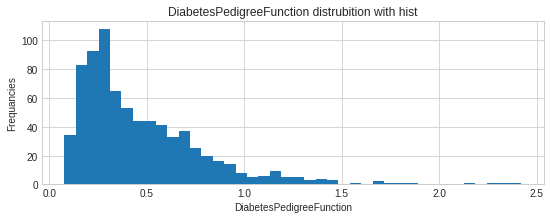

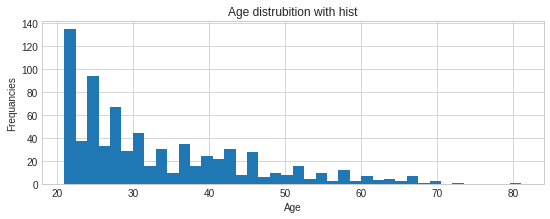

In [11]:
numeric_variables = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for variable in numeric_variables:
    plot_hist(variable)

<a id="3"></a><br>
# Outlier Detection

In [12]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)]. index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    # print() outlier_indices
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list((i for i, v in outlier_indices.items() if v > 2 ))
    
    return multiple_outliers

In [13]:
data.iloc[detect_outliers(data, ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label


* There is no double outlier varieble in database
* We don't drop any varieble

In [14]:
# drop the outlier variables
#data.drop(detect_outliers(data, ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"], axis=0)).reset_index(drop=True)

<a id="4"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

<a id="5"></a><br>
## Find Missing Value

* Missing value is 0 on this Database

In [15]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data[data==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Label                       500
dtype: int64

<a id="6"></a><br>
## Fill Missing Value

* Pregnancies variable include 0 value but its not missing value this mean she have never been pregnant so we don't change this
* Glucose, BloodPressure, SkinThickness, Insulin, BMI has include missing values. Lets get fill this values

In [18]:
data[data["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


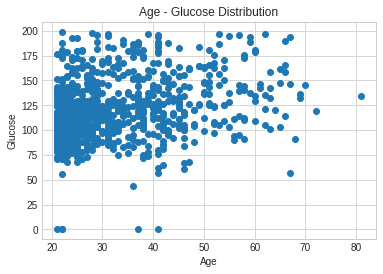

In [19]:
plt.scatter(x=data["Age"], y=data["Glucose"])
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age - Glucose Distribution")
plt.show()

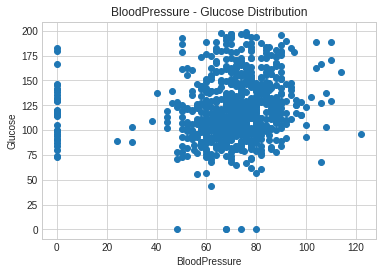

In [20]:
plt.scatter(x=data["BloodPressure"], y=data["Glucose"])
plt.xlabel("BloodPressure")
plt.ylabel("Glucose")
plt.title("BloodPressure - Glucose Distribution")
plt.show()

In [21]:
mean = int(np.mean(data[data["Glucose"]!=0]["Glucose"]))
print("Mean :",mean)
data["Glucose"] = [i if i != 0 else mean for i in data["Glucose"]]

Mean : 121


In [22]:
data[data["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label


In [23]:
# Fill BloodPressure
data[data["BloodPressure"] == 0]["BloodPressure"].count()

35

In [24]:
mean = int(np.mean(data[data["BloodPressure"] != 0]["BloodPressure"]))
print("Mean :",mean)
data["BloodPressure"] = [i if i != 0 else mean for i in data["BloodPressure"]]

Mean : 72


In [25]:
data[data["BloodPressure"] == 0]["BloodPressure"].count()

0

In [26]:
# Fill SkinThickness
data[data["SkinThickness"] == 0]["SkinThickness"].count()

227

In [27]:
mean = int(np.mean(data[data["SkinThickness"] != 0]["SkinThickness"]))
print("Mean :",mean)
data["SkinThickness"] = [i if i != 0 else mean for i in data["SkinThickness"]]

Mean : 29


In [28]:
data[data["SkinThickness"] == 0]["SkinThickness"].count()

0

In [29]:
# Fill Insulin
data[data["Insulin"] == 0]["Insulin"].count()

374

In [30]:
mean = int(np.mean(data[data["Insulin"] != 0]["Insulin"]))
print("Mean :",mean)
data["Insulin"] = [i if i != 0 else mean for i in data["Insulin"]]

Mean : 155


In [31]:
data[data["Insulin"] == 0]["Insulin"].count()

0

In [32]:
# Fill BMI
data[data["BMI"] == 0]["BMI"].count()

11

In [33]:
mean = int(np.mean(data[data["BMI"] != 0]["BMI"]))
print("Mean :",mean)
data["BMI"] = [i if i != 0 else mean for i in data["BMI"]]

Mean : 32


In [34]:
data[data["BMI"] == 0]["BMI"].count()

0

<a id="7"></a><br>
# Visualization

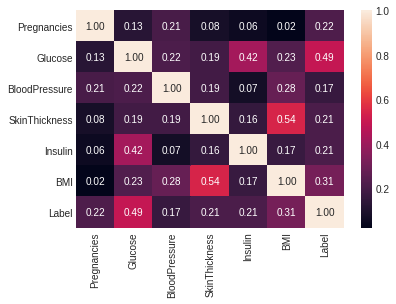

In [35]:
list1 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Label"]
sns.heatmap(data[list1].corr(), annot = True, fmt=".2f")
plt.show()

Glucose and BMI features seems to have corelation with Label feature (0.49, 0.31)

<a id="8"></a><br>
## Glucose Mean -- Label

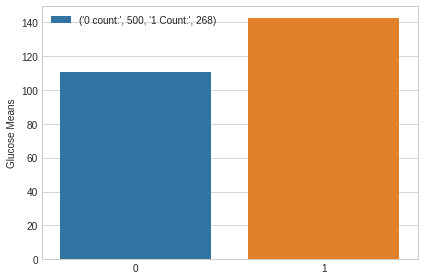

In [36]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["Glucose"].mean()
one_mean = data[data["Label"] == 1]["Glucose"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("Glucose Means")
g.legend()
plt.tight_layout()
plt.show()

* Diabetes Patient's glucose level more than not Diabetes Patient's

<a id="9"></a><br>
## Insulin Mean -- Label

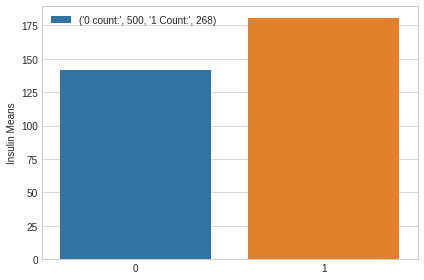

In [37]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["Insulin"].mean()
one_mean = data[data["Label"] == 1]["Insulin"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("Insulin Means")
g.legend()
plt.tight_layout()
plt.show()

Diabetes Patient's Insulin Levels more than Non Diabetes Patient's

<a id="10"></a><br>
## BMI Mean -- Label

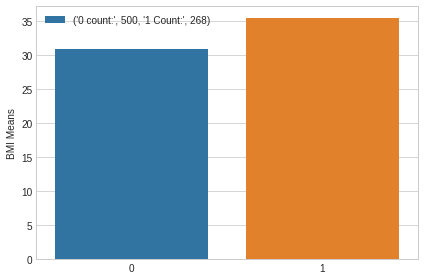

In [38]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["BMI"].mean()
one_mean = data[data["Label"] == 1]["BMI"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("BMI Means")
g.legend()
plt.tight_layout()
plt.show()

Diabetes Patient's BMI Values more than Non Diabetes Patient's

<a id="11"></a><br>
## BloodPressure Mean -- Label

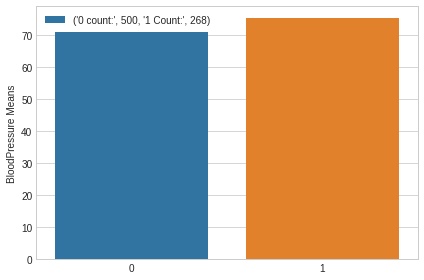

In [39]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["BloodPressure"].mean()
one_mean = data[data["Label"] == 1]["BloodPressure"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("BloodPressure Means")
g.legend()
plt.tight_layout()
plt.show()

Diabetes Patient's Insulin Levels little more than Non Diabetes Patient's

<a id="12"></a><br>
## Pregnancies Mean -- Label

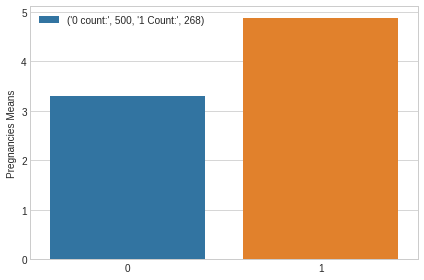

In [40]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["Pregnancies"].mean()
one_mean = data[data["Label"] == 1]["Pregnancies"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("Pregnancies Means")
g.legend()
plt.tight_layout()
plt.show()

Lower pregnancy average is good about Diabetes

<a id="13"></a><br>
## SkinThickness Mean -- Label

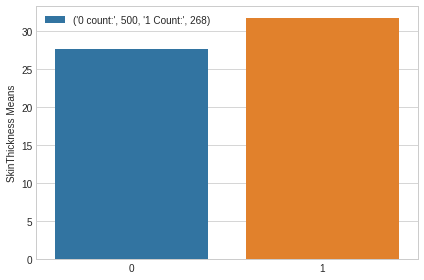

In [41]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["SkinThickness"].mean()
one_mean = data[data["Label"] == 1]["SkinThickness"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("SkinThickness Means")
g.legend()
plt.tight_layout()
plt.show()

<a id="14"></a><br>
## Age Mean -- Label

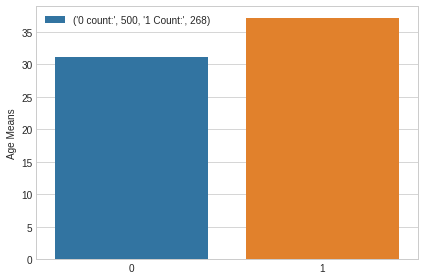

In [42]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["Age"].mean()
one_mean = data[data["Label"] == 1]["Age"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("Age Means")
g.legend()
plt.tight_layout()
plt.show()

Old people are under risk for Diabetes more than younger people

<a id="15"></a><br>
## DiabetesPedigreeFunction Mean -- Label

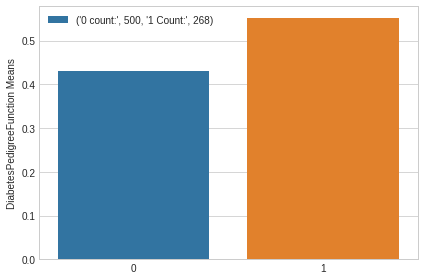

In [43]:
# 0 = Non Diabetes , 1 = Diabetes
zero_mean = data[data["Label"] == 0]["DiabetesPedigreeFunction"].mean()
one_mean = data[data["Label"] == 1]["DiabetesPedigreeFunction"].mean()
zero_count = data[data["Label"]==0]["Label"].count()
one_count = data[data["Label"]==1]["Label"].count()
g = sns.barplot(x=data["Label"].value_counts().index, y=[zero_mean,one_mean], label=("0 count:",zero_count,"1 Count:",one_count))
g.set_ylabel("DiabetesPedigreeFunction Means")
g.legend()
plt.tight_layout()
plt.show()

<a id="16"></a><br>
# Modelling

In [44]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

<a id="17"></a><br>
## Train - Test Split

In [45]:
# We will use this test data after select the model, parameters etc.

test = data.iloc[700:]
test_label= test["Label"]
test.drop(labels=["Label"], axis=1, inplace=True)

In [46]:
train_df = data.iloc[:700]
X_train = train_df.drop(labels=["Label"], axis=1)
Y_train = train_df["Label"]

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
print(f"x_train size: {len(x_train)}")
print(f"y_train size: {len(y_train)}")
print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")

x_train size: 560
y_train size: 560
x_test size: 140
y_test size: 140


<a id="18"></a><br>
## Simple Logistid Regression

In [47]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc_lr_train = round(lr.score(x_train, y_train)*100, 2)
acc_lr_test = round(lr.score(x_test, y_test)*100, 2)
print("Logistic Regression Train Accuracy: %", acc_lr_train)
print("Logistic Regression Test Accuracy: %", acc_lr_test)

Logistic Regression Train Accuracy: % 77.5
Logistic Regression Test Accuracy: % 76.43


In [48]:
clf = GaussianNB()
clf.fit(x_train,y_train)
acc_clf_train = round(clf.score(x_train, y_train)*100, 2)
acc_clf_test = round(clf.score(x_test, y_test)*100, 2)
print("GaussianNB Train Accuracy: %", acc_clf_train)
print("GaussianNB Test Accuracy: %", acc_clf_test)

GaussianNB Train Accuracy: % 75.89
GaussianNB Test Accuracy: % 72.86


<a id="19"></a><br>
## Hyperparameter Tuning -- Griid Search -- Cross Validation

We will compare 5 ml classifier and evaluate mean accuacy of each of them by stratified cros validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [49]:
random_state=42
classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state),
           KNeighborsClassifier(),
           GaussianNB()]

dt_param_grid = {"min_samples_split":range(10,500,20),
           "max_depth":range(1,20,2)}

svc_param_grid = {"kernel":["rbf"],
            "gamma":[0.001, 0.01, 0.1, 1],
            "C":[1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features":[1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty":["l1","l2"]}

knn_param_grid = {"n_neighbors":np.linspace(1,19,10, dtype=int).tolist(),
                 "weights":["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_params = [dt_param_grid, 
                    svc_param_grid, 
                    rf_param_grid, 
                    logreg_param_grid, 
                    knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_params[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7535714285714284
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7446428571428572
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
print(cv_result)
cv_results = pd.DataFrame({"Cross Validaiton Means":cv_result, "Models":["DecisionTree","SVM","RandomForest","LogisticRegression","KNN"]})
g = sns.barplot(x="Cross Validaiton Means", y = "Models", data = cv_results)
g.set_xlabel("Model Accuracy")
g.set_title("Cross Validation Score")
plt.show()

<a id="20"></a><br>
## Ensemble Modeling

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rf",best_estimators[2]),
                                        ("logreg",best_estimators[3])],
                                        voting="soft",
                                        n_jobs=-1)
votingC = votingC.fit(x_train,y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

<a id="21"></a><br>
## Predict Test Data

In [ ]:
prediction = votingC.predict(test)
print(accuracy_score(prediction, test_label))